In [1]:
## IMPORT REQUIRED LIBRIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

x = iris.data
y=iris.target

In [3]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size =0.2)

scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

Apply the Elbow Method

In [8]:
error_rates = []

for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)  # Train the model
    y_pred = knn.predict(x_test_scaled)
    error_rate =np.mean(y_pred != y_test)# Calculate the error rate
    error_rates.append(error_rate)

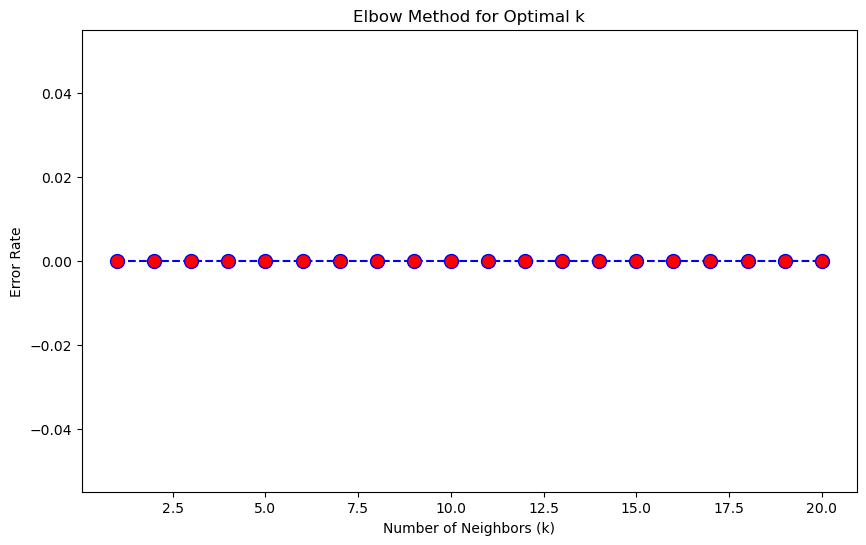

In [10]:
# Plot the Elbow Curve

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rates, color='blue', linestyle='dashed', marker='o', 
         markerfacecolor='red', markersize=10)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.show()

In [12]:
# Select the Optimal k

optimal_k = 5
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(x_train_scaled, y_train)

# Evaluate the model
y_pred_optimal = knn_optimal.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred_optimal)
print(f"Accuracy with optimal k={optimal_k}: {accuracy:.2f}")

Accuracy with optimal k=5: 1.00


## HYPERPARAMETER TUNNING

In [13]:
knn_neighbor = KNeighborsClassifier()

In [14]:
para_grid = {'n_neighbors': np.arange(1,20)}

In [15]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn_neighbor, para_grid, cv=5)

grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [16]:
best_knn = grid_search.best_estimator_

In [17]:
print(f"Best k: {grid_search.best_params_['n_neighbors']}")

Best k: 3


In [18]:
y_pred = best_knn.predict(x_test_scaled)

In [19]:
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy :{accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy :1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



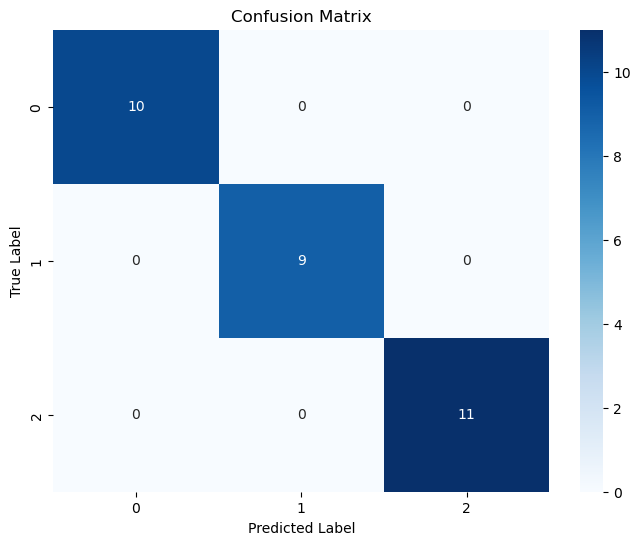

In [20]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()